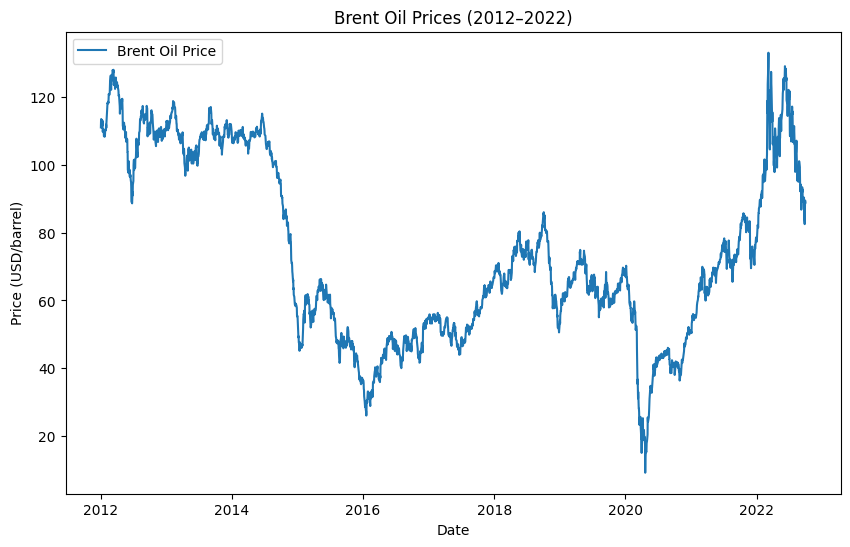

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('../data/brent_oil_prices.csv')

# Convert Date column with mixed formats
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True, errors='coerce')

# Check for any parsing errors
if df['Date'].isna().sum() > 0:
    print(f"Warning: {df['Date'].isna().sum()} dates could not be parsed and are NaN.")
    print("Unparsed dates:", df[df['Date'].isna()]['Date'].head())

# Filter for 2012–2022
df = df[(df['Date'] >= '2012-01-01') & (df['Date'] <= '2022-09-30')]

# Handle missing values in Price
df['Price'] = df['Price'].interpolate()

# Visualize price trend
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Price'], label='Brent Oil Price')
plt.xlabel('Date')
plt.ylabel('Price (USD/barrel)')
plt.title('Brent Oil Prices (2012–2022)')
plt.legend()
plt.show()